# Runge-Kutta method test
This notebook uses some Runge-Kutta methods to solve some simple differential equations (initial value problems) of the form
\begin{equation}
  dx/dt=f(t,x),\qquad x(t_0)=x_0.
\end{equation}
The methods are represented by Butcher tableaus, of the type `RKmethod`.

In [1]:
include("rk1.jl")
using .RK

In [2]:
names(RK)

14-element Vector{Symbol}:
 :RK
 :RKmethod
 :dirkA
 :dirkCR
 :expEuler
 :heun
 :impEuler
 :radauIIA2
 :radauIIA3
 :rk
 :rk4
 :rk_explicit
 :rk_implicit
 :trap

In [3]:
?rk4

search: rk4



```
rk4([T::Type])
```

Traditional 4th order Runge-Kutta method Butcher tableau


In [4]:
rk4m = rk4(Float64)

RKmethod{Float64}([0.0 0.0 0.0 0.0; 0.5 0.0 0.0 0.0; 0.0 0.5 0.0 0.0; 0.0 0.0 1.0 0.0], [0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666], [0.0, 0.5, 0.5, 1.0], true)

In [5]:
RK.isexplicit(rk4m)

true

In [6]:
?rk_explicit

search: rk_explicit



```
rk_explicit(f::Function,rkm::RKmethod{T},t0::T,x0::V,h::T,n::Int) where {T,V}
```

Solves $dx/dt=f(t,x)$ with initial condition $x(t_0)=x_0\in V$ using an explicit Runge-Kutta method with tableau `rkm`.

Note that `V` is an approximate vector space over `T` and $x(t)\in V$ for all $t$.

### Arguments

  * `x0` is the initial value
  * `f(t,x)` is the function defining the differential equation
  * `h` is the step size for the method
  * `n` is the number of steps to take of the method

Returns the pair `(xlist,tlist)`


In [7]:
xs,ts = rk_explicit((t,x)->x,rk4m,0.0,1.0,0.1,10)

([1.0, 1.1051708333333332, 1.2214025708506946, 1.3498584970625378, 1.4918242400806858, 1.6487206385968383, 1.8221179620919332, 2.0137516265967768, 2.2255395632923154, 2.459601413780071, 2.718279744135166], [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999])


(process:6188): GLib-GIO-WARNING **: 10:14:15.344: Unexpectedly, UWP app `KDEe.V.Okular_21.1203.941.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


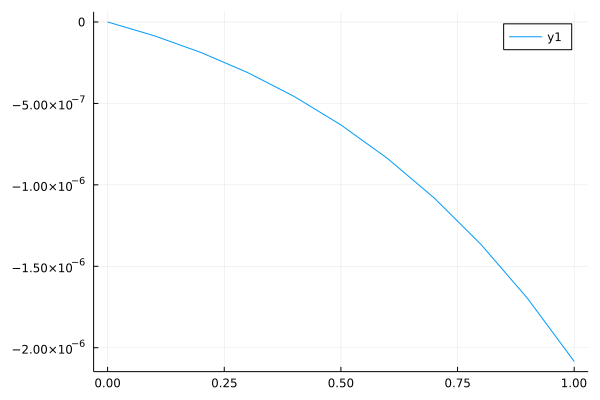

In [8]:
using Plots
plot(ts,@. xs - exp(ts))

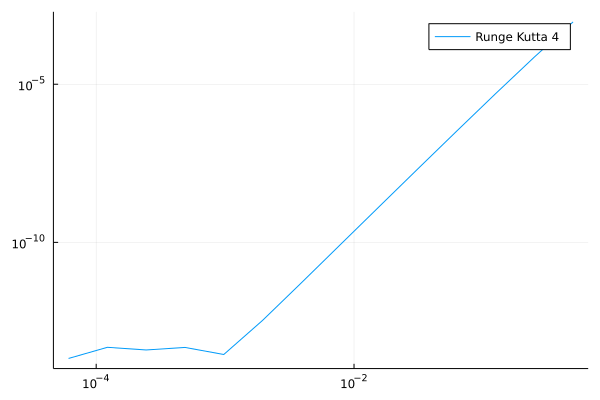

slope(RK4) = 3.919159264461601


In [9]:
nlist = 2 .^[1:14;]
hlist = 1 ./ nlist
maxerrs_rk = Float64[]
for i = 1:length(nlist)
    n = nlist[i]
    h = hlist[i]
    xs,ts = rk_explicit((t,x)->x,rk4m,0.0,1.0,h,n)
    push!(maxerrs_rk,maximum(@. abs(xs-exp(ts))))
end
display(plot(hlist,maxerrs_rk,xaxis=:log,yaxis=:log,label="Runge Kutta 4"))
slope_rk4 = (log(maxerrs_rk[9])-log(maxerrs_rk[1]))/(log(hlist[9])-log(hlist[1]))
println("slope(RK4) = ",slope_rk4)

### Comparison of explicit methods
Now we will see a comparison of the explicit methods `expEuler` (explicit Euler), `heun` (Heun's method), and  `rk4` the standard 4th order Runge-Kutta method. The orders of the errors (in terms of the step size $h$) are $\mathcal{O}(h)$, $\mathcal{O}(h^2)$, $\mathcal{O}(h^4)$ respectively. This should give slopes on the log-log graph of 1, 2, and 4 respectively. 

In [10]:
eulerm = expEuler()
heunm  = heun()

RKmethod{Float64}([0.0 0.0; 1.0 0.0], [0.5, 0.5], [0.0, 1.0], true)

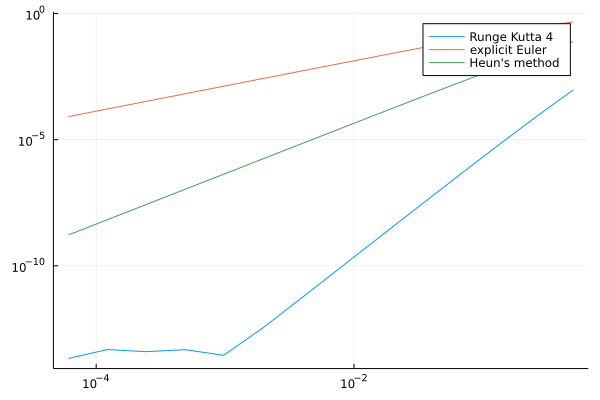

Slopes:
	 Euler:	0.9331667962564227
	 Heun:	1.9322047169229375
	 RK4:	3.919159264461601


In [11]:
nlist = 2 .^[1:14;]
hlist = 1 ./ nlist
maxerrs_ee = Float64[]
maxerrs_he = Float64[]
maxerrs_rk = Float64[]
for i = 1:length(nlist)
    n = nlist[i]
    h = hlist[i]
    xs,ts = rk_explicit((t,x)->x,eulerm,0.0,1.0,h,n)
    push!(maxerrs_ee,maximum(@. abs(xs-exp(ts))))
    xs,ts = rk_explicit((t,x)->x,heunm,0.0,1.0,h,n)
    push!(maxerrs_he,maximum(@. abs(xs-exp(ts))))
    xs,ts = rk_explicit((t,x)->x,rk4m,0.0,1.0,h,n)
    push!(maxerrs_rk,maximum(@. abs(xs-exp(ts))))
end
p = plot(hlist,maxerrs_rk,xaxis=:log,yaxis=:log,label="Runge Kutta 4")
plot!(p,hlist,maxerrs_ee,label="explicit Euler")
plot!(p,hlist,maxerrs_he,label="Heun's method")
slope_ee = (log(maxerrs_ee[9])-log(maxerrs_ee[1]))/(log(hlist[9])-log(hlist[1]))
slope_he = (log(maxerrs_he[9])-log(maxerrs_he[1]))/(log(hlist[9])-log(hlist[1]))
slope_rk = (log(maxerrs_rk[9])-log(maxerrs_rk[1]))/(log(hlist[9])-log(hlist[1]))
display(p)
println("Slopes:")
println("\t Euler:\t",slope_ee)
println("\t Heun:\t", slope_he)
println("\t RK4:\t",  slope_rk)

In [12]:
names(RK)

14-element Vector{Symbol}:
 :RK
 :RKmethod
 :dirkA
 :dirkCR
 :expEuler
 :heun
 :impEuler
 :radauIIA2
 :radauIIA3
 :rk
 :rk4
 :rk_explicit
 :rk_implicit
 :trap

In [13]:
?RK

search: RK rk rk4 rk4m RKmethod rk_implicit rk_explicit mark dirkA dirkCR unmark



```
module RK
```

Module for Runge-Kutta methods represented by a Butcher tableau in the `RKmethod` structure.


In [14]:
?RKmethod

search: RKmethod



```
RKmethod{T}
```

Runge-Kutta method represented by Butcher tableau. `T` is the floating point type.  The fields are:

  * `A` the main coefficients $a_{ij}$ of the tableau; an $s\times s$ matrix
  * `b` the coefficients $b_i$ for the final result of the method
  * `c` the coefficients $c_i$ for the time; note that $c_i = \sum_{j=1}^s a_{ij}$

The Runge-Kutta equations are $v_i = f(t_n+c_i h, x_n+h\sum_{j=1}^s a_{ij}v_j)$ and the output is $x_{n+1} = x_n +h\sum_{j=1}^s b_j v_j$.


In [15]:
names(RK)

14-element Vector{Symbol}:
 :RK
 :RKmethod
 :dirkA
 :dirkCR
 :expEuler
 :heun
 :impEuler
 :radauIIA2
 :radauIIA3
 :rk
 :rk4
 :rk_explicit
 :rk_implicit
 :trap

In [16]:
?RK.iter_solver!

```
function iter_solver!(f::Function,df::Function,x::V,vlist::Vector{V},A::Array{T,2},eps::T;
maxit::Int=1000) where {T,V}
```

This is a simple (fixed-point) iterative solver for the Runge-Kutta equations:  for $i=1,\ldots,s$: $v_i\gets f(t_i+c_ih,x+\sum_{j<i}a_{ij}v_j)$ This is, in effect, a block nonlinear Gauss-Seidel method. It repeats until the maximum change in $v_i$ is no more than `eps` or `maxit` iterations are reached. In the case of explicit methods, one iteration is sufficient to obtain the solution.
